<a href="https://colab.research.google.com/github/AksleyRios/DataAquosmic/blob/main/BaseUSA/Usa_Enorme_Modelos_Oxigeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación

In [2]:
!pip install openpyxl --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
def remove_out(DataIn, colName):
  q_l=DataIn[colName].quantile(0.25)
  q_h=DataIn[colName].quantile(0.75)
  IQR=q_h-q_l
  OutRange=IQR*1.5
  qoutl=(q_l-OutRange)
  qouth=(q_h+OutRange)
  DataOut=DataIn[(DataIn[colName] < qouth) & (DataIn[colName] > qoutl)]
  return DataOut
def getQuartiles(df,col):
  quartArray=(df[col].quantile(0),df[col].quantile(0.25),df[col].quantile(0.5),df[col].quantile(0.75),df[col].quantile(1))
  return quartArray

In [5]:
data=pd.read_excel("Base de Oxígeno con bandas USA.xlsx")
data.isnull().sum(axis=0)

Unnamed: 0     0
Lat            0
Lon            0
Fecha          0
Oxigeno        0
Fecha_ref      0
Fecha_plus     0
Fecha_less     0
Actual_Date    0
B1             0
B2             0
B3             0
B4             0
B5             0
B6             0
B7             0
B8             0
B9             0
B10            0
B11            0
dtype: int64

In [6]:
dataAnalisis=data.drop(labels=['Unnamed: 0','Lat','Lon','Fecha','Fecha_ref','Fecha_plus','Fecha_less','Actual_Date'], axis=1)
dataAnalisis.isnull().sum(axis=0)

Oxigeno    0
B1         0
B2         0
B3         0
B4         0
B5         0
B6         0
B7         0
B8         0
B9         0
B10        0
B11        0
dtype: int64

In [7]:
dataAnalisis=dataAnalisis.reset_index()
dataAnalisis=dataAnalisis.drop('index',axis=1)
for col in dataAnalisis:
  if col!='Oxigeno':
    max=dataAnalisis[col].max()
    min=dataAnalisis[col].min()
  #Asegurarse de que la feature tenga valores distintos, o sea una desviación mayor a 0.
    if max!=min:
      dataAnalisis[col]=dataAnalisis[col].apply(
          lambda value: (value-min)/(max-min)
          )
  #Si la feature tiene una desviación de 0 (todos sus valores son iguales), desecharla
    else:
      dataAnalisis.drop(col,axis=1)
dataAnalisis

,Oxigeno,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11
0,8.3,0.352768,0.347018,0.332101,0.330097,0.309087,0.470573,0.612931,0.361806,0.010299,0.711697,0.726120
1,8.3,0.352768,0.347018,0.332101,0.330097,0.309087,0.470573,0.612931,0.361806,0.010299,0.711697,0.726120
2,8.3,0.121667,0.122302,0.134877,0.122064,0.073248,0.082596,0.101526,0.142029,0.005482,0.855235,0.879011
3,8.2,0.121667,0.122302,0.134877,0.122064,0.073248,0.082596,0.101526,0.142029,0.005482,0.855235,0.879011
4,7.9,0.121667,0.122302,0.134877,0.122064,0.073248,0.082596,0.101526,0.142029,0.005482,0.855235,0.879011
...,...,...,...,...,...,...,...,...,...,...,...,...
38473,6.0,0.044891,0.041948,0.047479,0.034989,0.009860,0.007704,0.008315,0.046467,0.003987,0.868297,0.898788
38474,4.2,0.043650,0.038644,0.041414,0.038393,0.010657,0.006185,0.005744,0.045501,0.005150,0.883716,0.913911
38475,6.0,0.046909,0.044836,0.052332,0.040240,0.011141,0.008519,0.008315,0.052959,0.001827,0.867610,0.897686
38476,5.4,0.049114,0.046890,0.055125,0.044409,0.010391,0.005408,0.005197,0.054710,0.005482,0.873846,0.905584


#EDA

##Histograma

In [8]:
fig = px.histogram(dataAnalisis, x="Oxigeno")
fig.show()

## Correlaciones

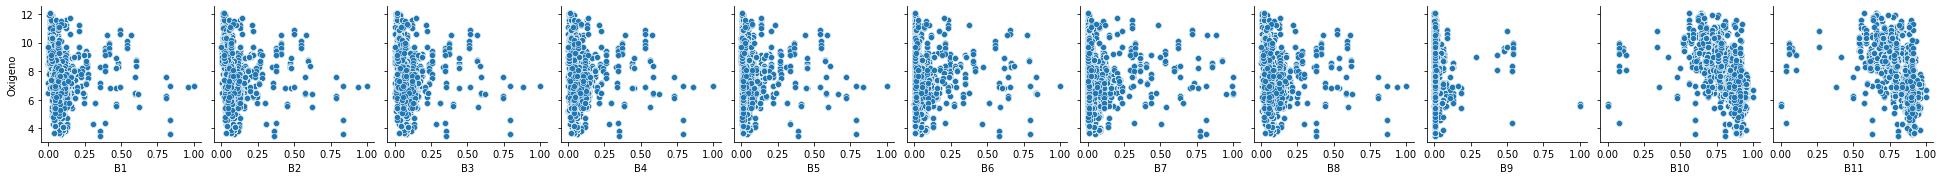

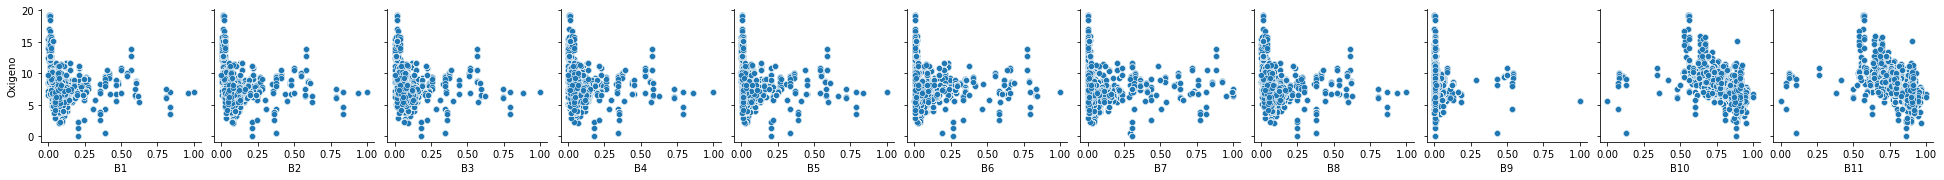

In [9]:
import seaborn as sns
sns.pairplot(remove_out(dataAnalisis, 'Oxigeno'),x_vars=["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11"],
    y_vars=["Oxigeno"])
sns.pairplot(dataAnalisis,x_vars=["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11"],
    y_vars=["Oxigeno"])

## Líneas

In [10]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
overlapping = 0.150

In [11]:
qOxigeno=getQuartiles(dataAnalisis, 'Oxigeno')

In [12]:
dataAnalisis1=dataAnalisis.loc[(dataAnalisis['Oxigeno']>=qOxigeno[0]) & (dataAnalisis['Oxigeno']<=qOxigeno[1])]
dataAnalisis2=dataAnalisis.loc[(dataAnalisis['Oxigeno']>=qOxigeno[1]) & (dataAnalisis['Oxigeno']<=qOxigeno[2])]
dataAnalisis3=dataAnalisis.loc[(dataAnalisis['Oxigeno']>=qOxigeno[2]) & (dataAnalisis['Oxigeno']<=qOxigeno[3])]
dataAnalisis4=dataAnalisis.loc[(dataAnalisis['Oxigeno']>=qOxigeno[3]) & (dataAnalisis['Oxigeno']<=qOxigeno[4])]

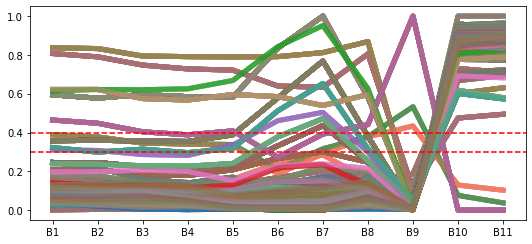

In [13]:
for index, row in dataAnalisis1.drop('Oxigeno',axis=1).iterrows():
  line=plt.plot(row, alpha=overlapping,lw=5)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

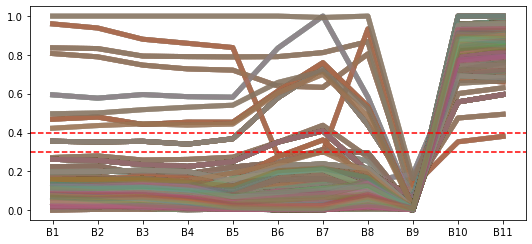

In [14]:
for index, row in dataAnalisis2.drop('Oxigeno',axis=1).iterrows():
  line=plt.plot(row, alpha=overlapping,lw=5)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

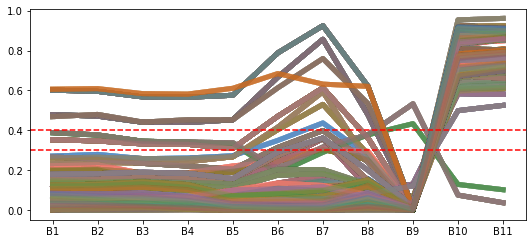

In [15]:
for index, row in dataAnalisis3.drop('Oxigeno',axis=1).iterrows():
  line=plt.plot(row, alpha=overlapping,lw=5)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

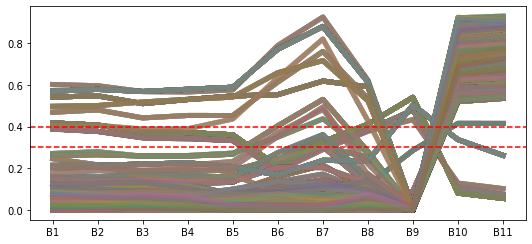

In [16]:
for index, row in dataAnalisis4.drop('Oxigeno',axis=1).iterrows():
  line=plt.plot(row, alpha=overlapping,lw=5)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

# Modelos

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
Y = remove_out(dataAnalisis,'Oxigeno')['Oxigeno']
X = remove_out(dataAnalisis,'Oxigeno').drop(labels=['Oxigeno'], axis=1)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Random forrest

In [20]:
rfn = RandomForestRegressor(max_depth=6, min_samples_leaf=5)
rfn.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=5)

In [21]:
Yr_test=rfn.predict(X_test)
Yr_train=rfn.predict(X_train)

In [22]:
mean_squared_error(Yr_test,Y_test)

0.6957170982724104

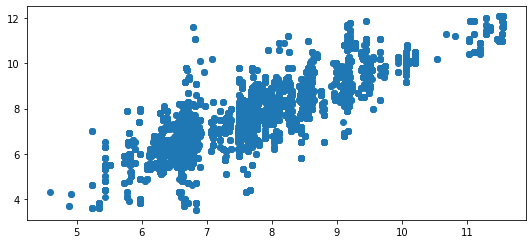

In [23]:
plt.scatter(Yr_test, Y_test)
plt.show()

In [24]:
mean_squared_error(Yr_train,Y_train)

0.6855813276539553

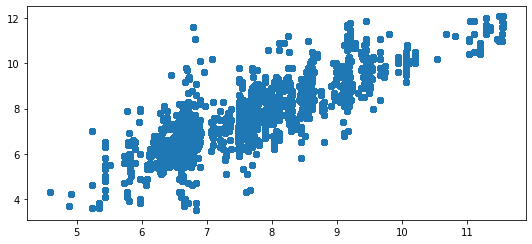

In [25]:
plt.scatter(Yr_train, Y_train)
plt.show()

## Regresión lineal

In [26]:
lr=linear_model.LinearRegression()
lr=lr.fit(X_train, Y_train)

In [27]:
Yl_test=lr.predict(X_test)
Yl_train=lr.predict(X_train)

In [28]:
mean_squared_error(Yl_test,Y_test)

1.1266932743399043

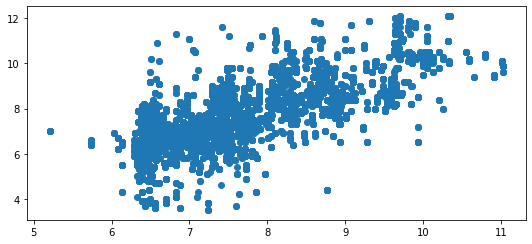

In [29]:
plt.scatter(Yl_test, Y_test)
plt.show()

In [30]:
mean_squared_error(Yl_train,Y_train)

1.154966509558425

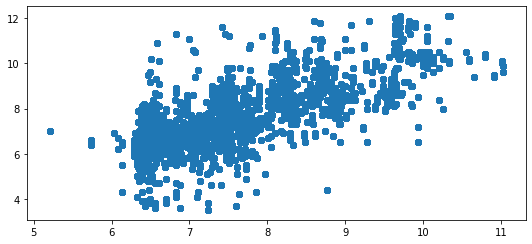

In [31]:
plt.scatter(Yl_train, Y_train)
plt.show()

## Red neuronal

In [32]:
scaler = StandardScaler()  
scaler.fit(X_train)

StandardScaler()

In [33]:
Xn_train = scaler.transform(X_train)  
Xn_test = scaler.transform(X_test) 

In [34]:
nnw = MLPRegressor(solver='adam', alpha=1e-5,hidden_layer_sizes=(64,16,8), max_iter=100000)
nnw.fit(Xn_train, Y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(64, 16, 8), max_iter=100000)

In [35]:
Yn_test=nnw.predict(Xn_test)
Yn_train=nnw.predict(Xn_train)

In [36]:
mean_squared_error(Yn_test,Y_test)

0.4991140939877578

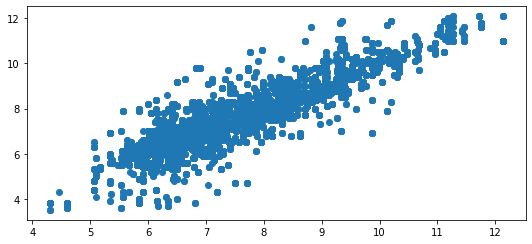

In [37]:
plt.scatter(Yn_test, Y_test)
plt.show()

In [38]:
mean_squared_error(Yn_train,Y_train)

0.48800277049935314

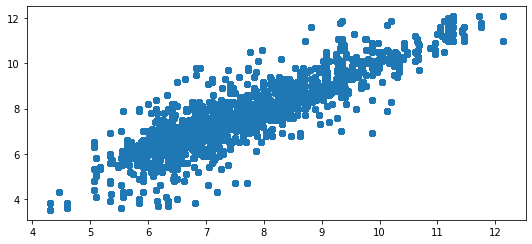

In [39]:
plt.scatter(Yn_train, Y_train)
plt.show()

##Métricas

In [40]:
Dataset=['Oxigeno','Oxigeno','Oxigeno']
Model=['RFR','SLR','MLPR']
MSETest=[mean_squared_error(Yr_test,Y_test), mean_squared_error(Yl_test,Y_test),mean_squared_error(Yn_test,Y_test)]
MSETrain=[mean_squared_error(Yr_train,Y_train), mean_squared_error(Yl_train,Y_train), mean_squared_error(Yn_train,Y_train)]
minarr=[dataAnalisis.min()[0],dataAnalisis.min()[0],dataAnalisis.min()[0]]
maxarr=[dataAnalisis.max()[0],dataAnalisis.max()[0],dataAnalisis.max()[0]]
Datasetpd = pd.DataFrame(Dataset)
Datasetpd.columns = ['Dataset']
Modelpd = pd.DataFrame(Model)
Modelpd.columns=['Modelo']
MSETestpd = pd.DataFrame(MSETest)
MSETestpd.columns=['MSETest']
MSETrainpd = pd.DataFrame(MSETrain)
MSETrainpd.columns = ['MSETrain']
minpd = pd.DataFrame(minarr)
minpd.columns = ['Min']
maxpd = pd.DataFrame(maxarr)
maxpd.columns = ['Max']

Track = Datasetpd.join(Modelpd)
Track = Track.join(MSETestpd)
Track = Track.join(MSETrainpd)
Track = Track.join(minpd)
Track = Track.join(maxpd)

Track

,Dataset,Modelo,MSETest,MSETrain,Min,Max
0,Oxigeno,RFR,0.695717,0.685581,0.1,19.2
1,Oxigeno,SLR,1.126693,1.154967,0.1,19.2
2,Oxigeno,MLPR,0.499114,0.488003,0.1,19.2


In [42]:
Dataset=['Oxigeno','Oxigeno','Oxigeno']
Model=['RFR','SLR','MLPR']
MSETest=[np.sqrt(mean_squared_error(Yr_test,Y_test)), np.sqrt(mean_squared_error(Yl_test,Y_test)),np.sqrt(mean_squared_error(Yn_test,Y_test))]
MSETrain=[np.sqrt(mean_squared_error(Yr_train,Y_train)), np.sqrt(mean_squared_error(Yl_train,Y_train)), np.sqrt(mean_squared_error(Yn_train,Y_train))]
minarr=[dataAnalisis.min()[0],dataAnalisis.min()[0],dataAnalisis.min()[0]]
maxarr=[dataAnalisis.max()[0],dataAnalisis.max()[0],dataAnalisis.max()[0]]
Datasetpd = pd.DataFrame(Dataset)
Datasetpd.columns = ['Dataset']
Modelpd = pd.DataFrame(Model)
Modelpd.columns=['Modelo']
MSETestpd = pd.DataFrame(MSETest)
MSETestpd.columns=['MSETest']
MSETrainpd = pd.DataFrame(MSETrain)
MSETrainpd.columns = ['MSETrain']
minpd = pd.DataFrame(minarr)
minpd.columns = ['Min']
maxpd = pd.DataFrame(maxarr)
maxpd.columns = ['Max']

Track = Datasetpd.join(Modelpd)
Track = Track.join(MSETestpd)
Track = Track.join(MSETrainpd)
Track = Track.join(minpd)
Track = Track.join(maxpd)

Track

,Dataset,Modelo,MSETest,MSETrain,Min,Max
0,Oxigeno,RFR,0.834097,0.827998,0.1,19.2
1,Oxigeno,SLR,1.061458,1.074694,0.1,19.2
2,Oxigeno,MLPR,0.706480,0.698572,0.1,19.2
